In [105]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can accesshttps://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [114]:
df = pd.read_csv('german_credit.csv')
df.head()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [115]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [117]:
df.columns.values
df.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

<Figure size 432x288 with 0 Axes>

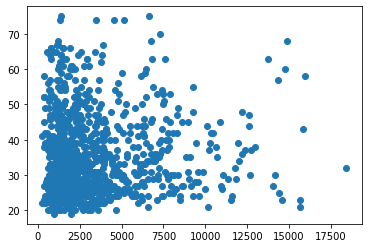

<Figure size 432x288 with 0 Axes>

In [118]:
plt.scatter(df['credit_amount'],df["age"])
plt.figure()



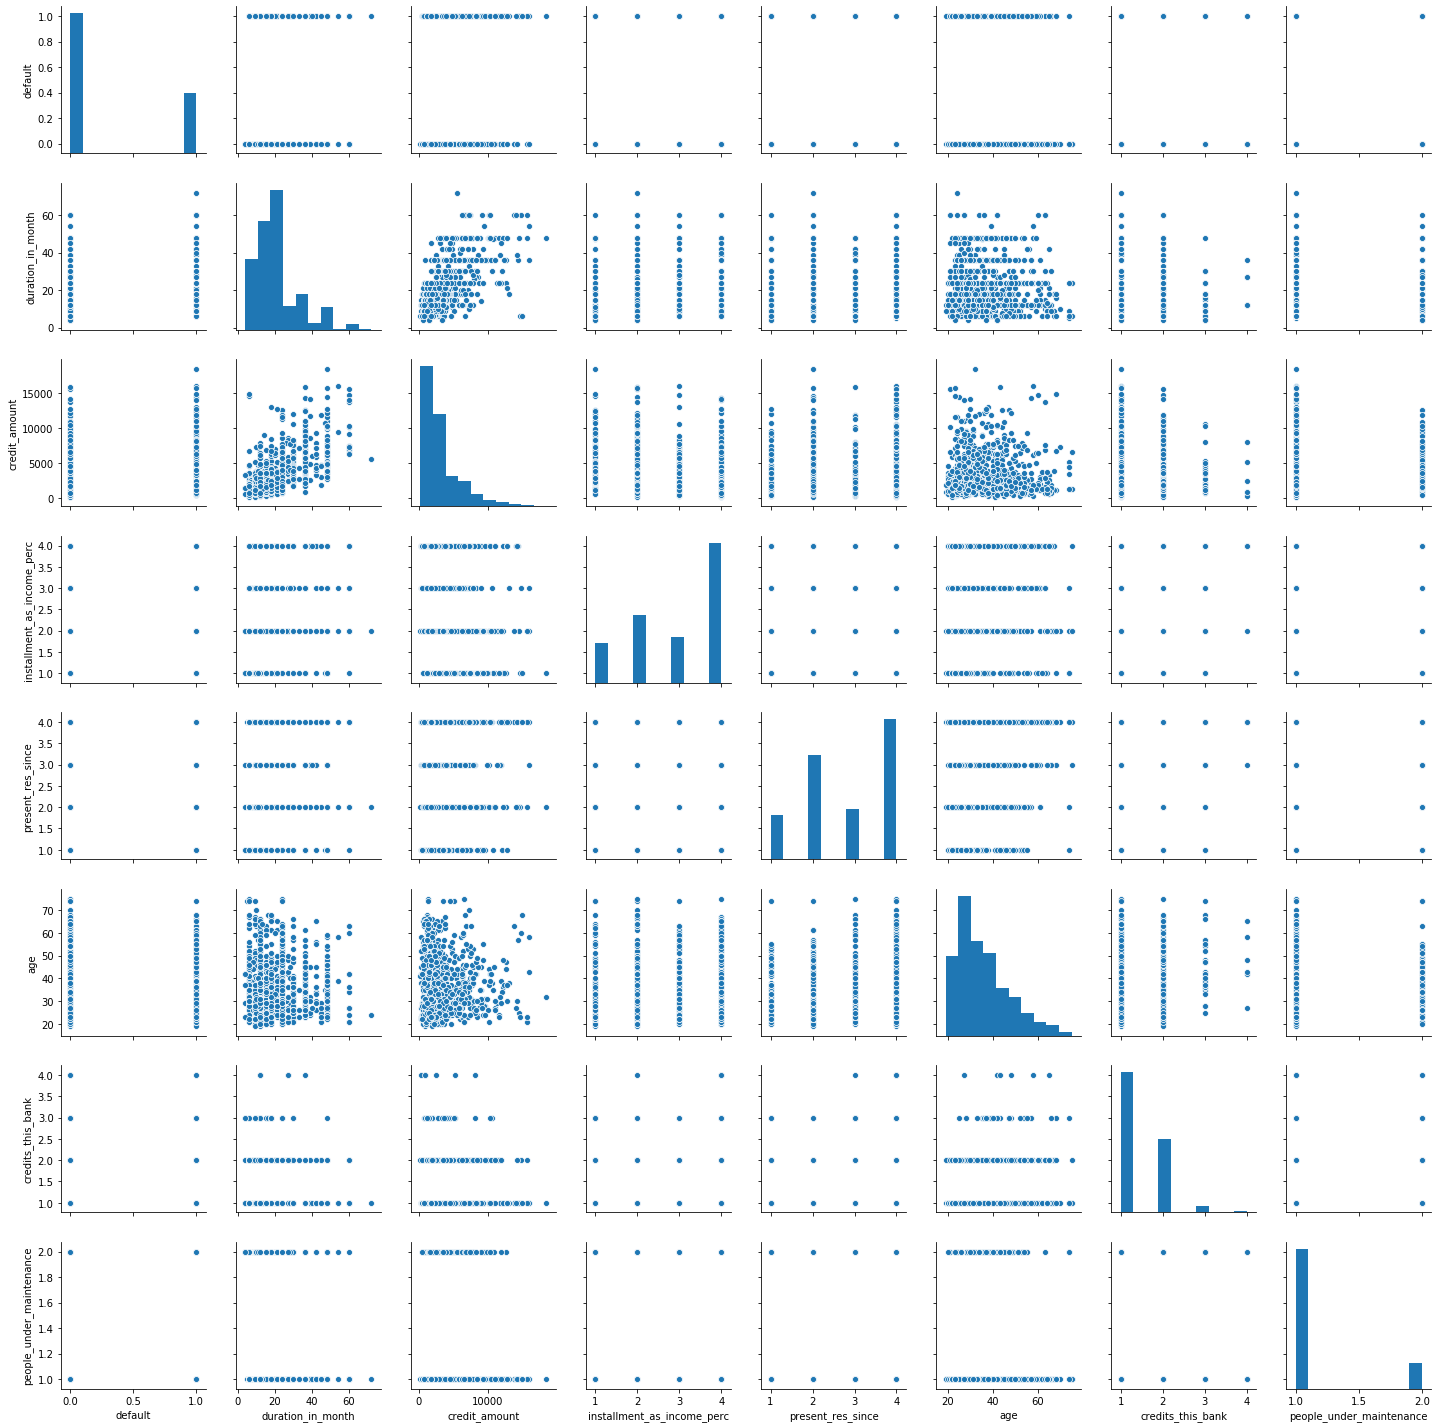

In [100]:
sns.pairplot(df)

Text(0, 0.5, 'Count')

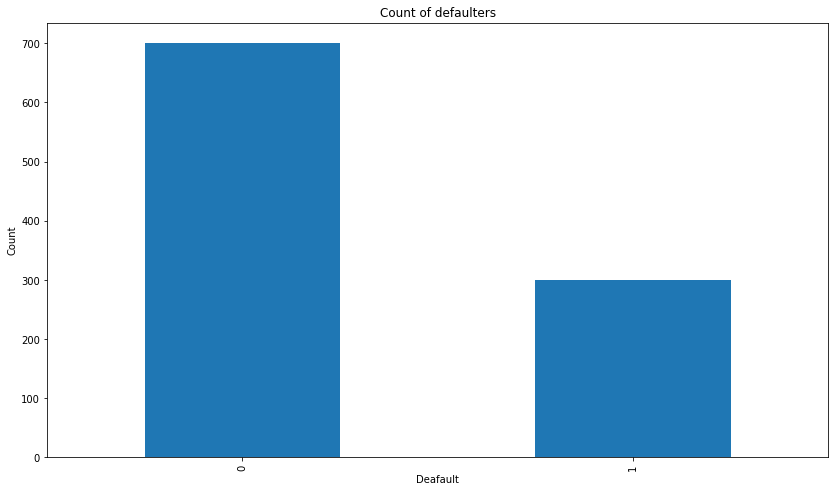

In [101]:
ax = df['default'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of defaulters")
ax.set_xlabel("Deafault")
ax.set_ylabel("Count")

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies



In [119]:
# Print Shape of model data
df.shape

(1000, 21)

In [120]:
y = df ['default']
original_columns = list(df.columns)
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
dummy_df = pd.get_dummies(df, columns= categorical_columns,dummy_na= False, drop_first=True)
new_columns = [c for c in dummy_df.columns if c not in original_columns]
print(new_columns)

['account_check_status_< 0 DM', 'account_check_status_>= 200 DM / salary assignments for at least 1 year', 'account_check_status_no checking account', 'credit_history_critical account/ other credits existing (not at this bank)', 'credit_history_delay in paying off in the past', 'credit_history_existing credits paid back duly till now', 'credit_history_no credits taken/ all credits paid back duly', 'purpose_business', 'purpose_car (new)', 'purpose_car (used)', 'purpose_domestic appliances', 'purpose_education', 'purpose_furniture/equipment', 'purpose_radio/television', 'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM', 'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ', 'savings_unknown/ no savings account', 'present_emp_since_... < 1 year ', 'present_emp_since_1 <= ... < 4 years', 'present_emp_since_4 <= ... < 7 years', 'present_emp_since_unemployed', 'personal_status_sex_male : divorced/separated', 'personal_status_sex_male : married/widowed', 'personal_statu

In [129]:
dummy_df = dummy_df.drop(columns = 'default')

In [122]:
categorical_columns

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [130]:
dummy_df.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,0,0,1,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,1,1,0,0,0,1,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

### Drop the original variables which are converted to dummy

In [131]:
concat=pd.concat([df,dummy_df],axis=1)
concat=concat.drop(columns=categorical_columns)
print(concat.shape)
concat.head()

(1000, 56)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,duration_in_month,credit_amount,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,6,1169,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,48,5951,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,12,2096,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,42,7882,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,24,4870,...,1,1,0,0,0,1,0,0,0,1


In [54]:
cor = df.corr()
print(cor)

                             default  duration_in_month  credit_amount  \
default                     1.000000           0.214927       0.154739   
duration_in_month           0.214927           1.000000       0.624984   
credit_amount               0.154739           0.624984       1.000000   
installment_as_income_perc  0.072404           0.074749      -0.271316   
present_res_since           0.002967           0.034067       0.028926   
age                        -0.091127          -0.036136       0.032716   
credits_this_bank          -0.045732          -0.011284       0.020795   
people_under_maintenance   -0.003015          -0.023834       0.017142   

                            installment_as_income_perc  present_res_since  \
default                                       0.072404           0.002967   
duration_in_month                             0.074749           0.034067   
credit_amount                                -0.271316           0.028926   
installment_as_income_per

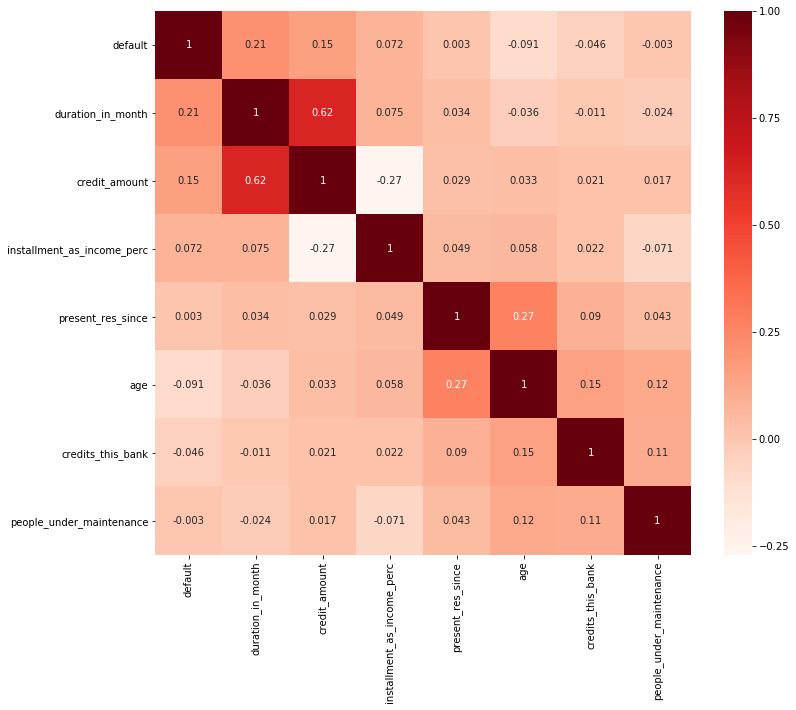

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [132]:
y = concat['default']
x=concat.drop(columns=['default'])
print(concat['default'])

0      0
1      1
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
970    0
971    0
972    1
973    1
974    0
975    0
976    0
977    0
978    1
979    1
980    1
981    1
982    0
983    1
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: int64


In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=26)

In [134]:
print('x.train:',x_train.shape,'\ny.train:',y_train.shape)

x.train: (700, 55) 
y.train: (700,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [135]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
classifier_g=classifier.fit(x_train, y_train) 

In [136]:
print(classifier_g.predict)

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)>


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [137]:
from sklearn import metrics
y_predict = classifier_g.predict(x_test)
print(classifier_g.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7566666666666667
[[199  22]
 [ 51  28]]


### Q6 Show the list of the features importance( 1 Marks)

In [138]:
print("Below listed feature importance in decending order")

feature_imp=pd.DataFrame([classifier_g.feature_importances_],columns=x_train.columns).T
feature_imp.columns=['Importance']
feature_imp.sort_values(by='Importance',ascending=False)

Below listed feature importance in decending order


,Importance
credit_amount,0.077618
credit_amount,0.076249
age,0.065491
age,0.064574
duration_in_month,0.056275
duration_in_month,0.052683
account_check_status_no checking account,0.051947
account_check_status_< 0 DM,0.030017
installment_as_income_perc,0.025125
installment_as_income_perc,0.024858


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [142]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [143]:
ger_score=[]

ger_kflod=KFold(n_splits=num_folds,random_state=seed)

for train,_ in ger_kflod.split(x_train,y_train):
    classifier_g = classifier.fit(x_train.iloc[train,:], y_train.iloc[train])
    ger_score.append(classifier_g.score(x_test , y_test))

In [144]:
col=[]
for i in range(1,11):
    j='Fold '+ str(i)
    col.append(j)
Model_score_KFold=pd.DataFrame(ger_score).T
Model_score_KFold.columns=col
print('Model Score for 10 Folds are listed blow:')
Model_score_KFold

Model Score for 10 Folds are listed blow:


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10
0,0.763333,0.77,0.773333,0.77,0.763333,0.776667,0.756667,0.776667,0.756667,0.776667


In [145]:
#Calculate Mean score
np.mean(ger_score).round(3)

0.768

In [146]:
# Calculate score standard deviation using std()
np.std(ger_score).round(4)

0.0075

# Q8 Print the confusion matrix( 1 Marks)

In [148]:
ger_score=[]

ger_kflod=KFold(n_splits=10,random_state=77)
i=1
for train,_ in ger_kflod.split(x_train,y_train):
    rfcl_ger_cre = classifier.fit(x_train.iloc[train,:], y_train.iloc[train])
    y_predict = classifier.predict(x_test)
    i=0+i
    print('Confusion matrics for Fold'+str(i),':\n',metrics.confusion_matrix(y_test, y_predict))
    i=i+1

Confusion matrics for Fold1 :
 [[195  26]
 [ 45  34]]
Confusion matrics for Fold2 :
 [[200  21]
 [ 48  31]]
Confusion matrics for Fold3 :
 [[200  21]
 [ 47  32]]
Confusion matrics for Fold4 :
 [[201  20]
 [ 49  30]]
Confusion matrics for Fold5 :
 [[199  22]
 [ 49  30]]
Confusion matrics for Fold6 :
 [[207  14]
 [ 53  26]]
Confusion matrics for Fold7 :
 [[198  23]
 [ 50  29]]
Confusion matrics for Fold8 :
 [[207  14]
 [ 53  26]]
Confusion matrics for Fold9 :
 [[195  26]
 [ 47  32]]
Confusion matrics for Fold10 :
 [[202  19]
 [ 48  31]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [149]:
y_predict=classifier.predict(x_test)
from sklearn.metrics import classification_report,roc_curve,confusion_matrix,accuracy_score, roc_auc_score,auc

print('Classification accuracy and sensitivity as shown below:')
pre_dat_NB=pd.DataFrame(classification_report(y_test,y_predict,output_dict=True)).T
pre_dat_NB

Classification accuracy and sensitivity as shown below:


,f1-score,precision,recall,support
0,0.857749,0.808000,0.914027,221.000000
1,0.480620,0.620000,0.392405,79.000000
accuracy,0.776667,0.776667,0.776667,0.776667
macro avg,0.669185,0.714000,0.653216,300.000000
weighted avg,0.758439,0.758493,0.776667,300.000000


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

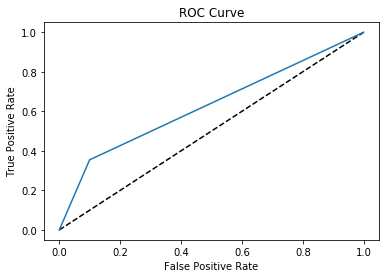

In [153]:
classifier_new = classifier.fit(x_train, y_train)
y_predict=classifier_new.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test,y_predict )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [154]:
y_predict=classifier_new.predict(x_test)
auc = roc_auc_score(y_test,y_predict)
print('AUC(Persentage of ROS plot that is underneath the cuve is:)', "{:.2%}".format(auc))

AUC(Persentage of ROS plot that is underneath the cuve is:) 62.74%


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [155]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [157]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

rfm = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [158]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7639999999999999
Standard deviation:  0.009865765724632495
